# Apple Leave Disease Detection using EfficientNet

This stage of the task aims to visualize apple leaves dataset using

In [1]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


## Load and Prepare the Dataset

In [3]:
import glob
import cv2
import numpy as np

In [4]:
# Initialize lists to hold the images and labels
Apple_Apple_scab = []
Apple_Black_rot = []
Apple_Cedar_apple_rust = []
Apple_healthy = []

# Load apple scab images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Apple_scab/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Apple_scab.append(img)

# Load apple black rot images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Black_rot/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Black_rot.append(img)

# Load cedar apple rust images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___Cedar_apple_rust/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_Cedar_apple_rust.append(img)

# Load apple healthy images
for f in glob.iglob("C:/Users/ceagbaraji/Documents/plant_apple/Apple___healthy/*.JPG"):
    img = cv2.imread(f)
    img = cv2.resize(img, (224, 224))
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    Apple_healthy.append(img)

In [5]:
# Convert lists to numpy arrays
Apple_Apple_scab = np.array(Apple_Apple_scab)
Apple_Black_rot = np.array(Apple_Black_rot)
Apple_Cedar_apple_rust = np.array(Apple_Cedar_apple_rust)
Apple_healthy = np.array(Apple_healthy)
d_s = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy))

In [6]:
Apple_Apple_scab.shape

(630, 224, 224, 3)

In [7]:
Apple_Black_rot.shape

(621, 224, 224, 3)

In [8]:
Apple_Cedar_apple_rust.shape

(275, 224, 224, 3)

In [9]:
Apple_healthy.shape

(989, 224, 224, 3)

In [10]:
d_s.shape

(2515, 224, 224, 3)

In [11]:
np.random.choice(10, 5, replace=False)

array([9, 8, 3, 7, 5])

## Visualize the Dataset

In [12]:
import matplotlib.pyplot as plt
import tensorflow as tf

In [13]:
def plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5):
    Apple_Apple_scab_imgs = Apple_Apple_scab[np.random.choice(Apple_Apple_scab.shape[0], num, replace=False)]
    Apple_Black_rot_imgs = Apple_Black_rot[np.random.choice(Apple_Black_rot.shape[0], num, replace=False)]
    Apple_Cedar_apple_rust_imgs = Apple_Cedar_apple_rust[np.random.choice(Apple_Cedar_apple_rust.shape[0], num, replace=False)]
    Apple_healthy_imgs = Apple_healthy[np.random.choice(Apple_healthy.shape[0], num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Apple scab')
        plt.imshow(Apple_Apple_scab_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Black rot')
        plt.imshow(Apple_Black_rot_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple Cedar apple rust')
        plt.imshow(Apple_Cedar_apple_rust_imgs[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1, num, i+1)
        plt.title('Apple healthy')
        plt.imshow(Apple_healthy_imgs[i])

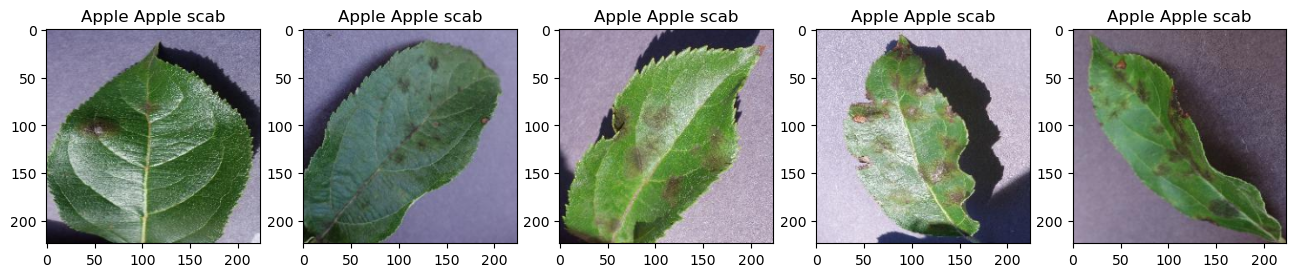

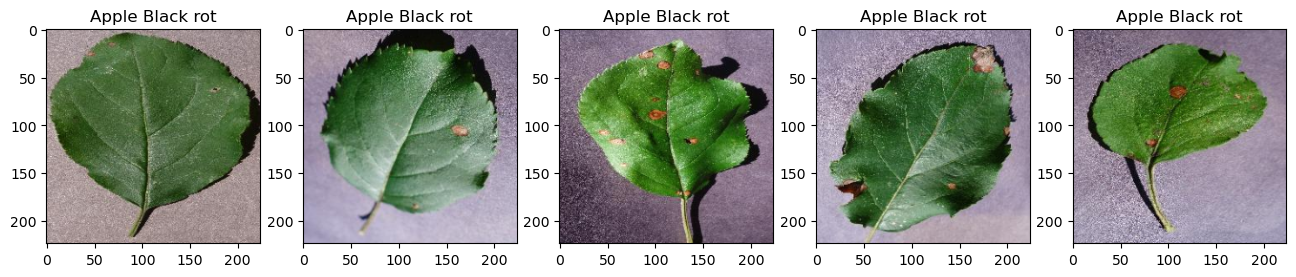

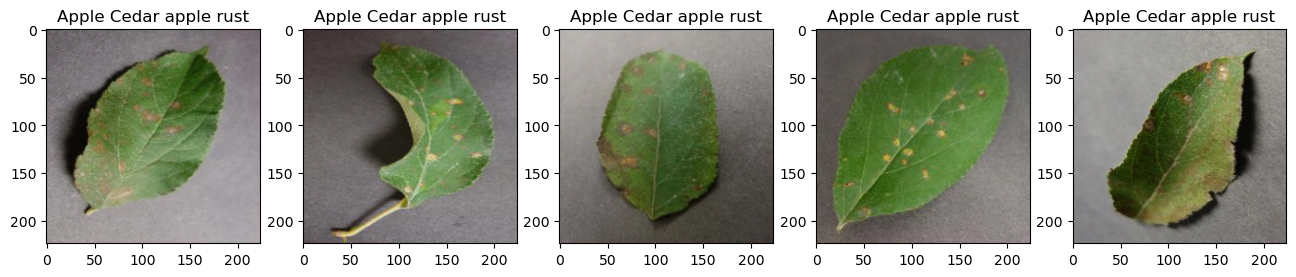

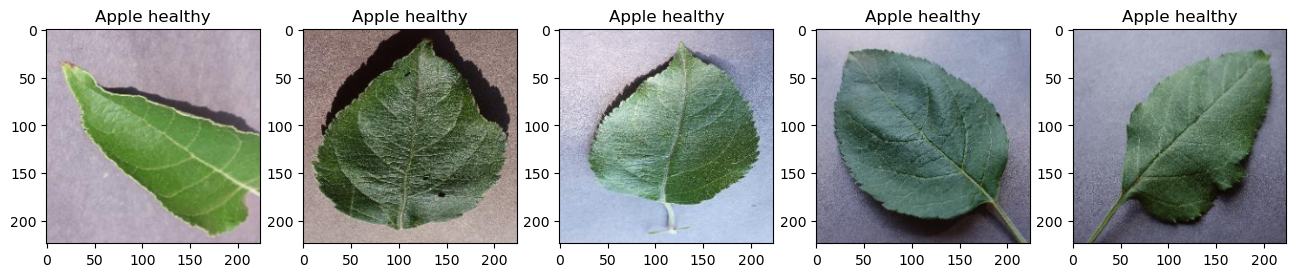

In [14]:
plot_random(Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy, num=5)

In [15]:
# Prepare labels
Apple_Apple_scab_labels = np.full(len(Apple_Apple_scab), 0)
Apple_Black_rot_labels = np.full(len(Apple_Black_rot), 1)
Apple_Cedar_apple_rust_labels = np.full(len(Apple_Cedar_apple_rust), 2)
Apple_healthy_labels = np.full(len(Apple_healthy), 3)

In [16]:
# Concatenate data and labels
images = np.concatenate((Apple_Apple_scab, Apple_Black_rot, Apple_Cedar_apple_rust, Apple_healthy), axis=0)
labels = np.concatenate((Apple_Apple_scab_labels, Apple_Black_rot_labels, Apple_Cedar_apple_rust_labels, Apple_healthy_labels), axis=0)

In [17]:
# Normalize the data to [0, 1] range
images = images / 255.0

# Split the Dataset

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Split the dataset into training and testing sets
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

# Define EfficientNet Model with Untrainable Base

In [20]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [26]:
# Load the EfficientNetB0 architecture with pre-trained ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training them initially
base_model.trainable = False

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_4 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_2               │ (None, 224, 224, 3)       │               7 │ rescaling_4[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_5 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_5[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 164,484 (642.52 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

# Train the EfficientNet Model

In [27]:
# Train the model
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 23s 248ms/step - accuracy: 0.2384 - loss: 1.4304 - val_accuracy: 0.4056 - val_loss: 1.3836
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.2593 - loss: 1.4036 - val_accuracy: 0.4056 - val_loss: 1.3733
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 217ms/step - accuracy: 0.2739 - loss: 1.3962 - val_accuracy: 0.4056 - val_loss: 1.3642
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.2889 - loss: 1.3915 - val_accuracy: 0.4056 - val_loss: 1.3557
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 216ms/step - accuracy: 0.2962 - loss: 1.3896 - val_accuracy: 0.4056 - val_loss: 1.3481
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.3148 - loss: 1.3717 - val_accuracy: 0.4056 - val_loss: 1.3418
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 221ms/step - accuracy: 0.3093 - loss: 1.3800 - val_accuracy: 0.4056 - val_loss: 1.3364
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 219ms/step - accuracy: 0.3328 - loss: 1.3666 - val_accu

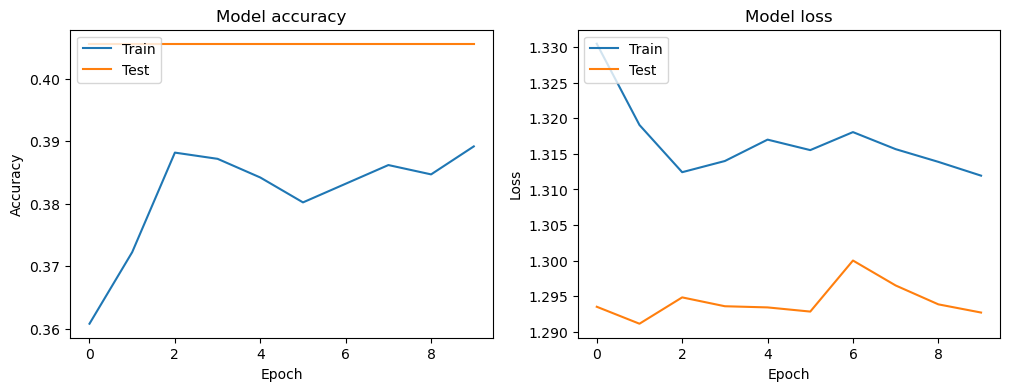

In [24]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [30]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.4085 - loss: 1.3144
Test Loss: 1.3221
Test Accuracy: 0.4056


In [31]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 265ms/step


In [32]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']


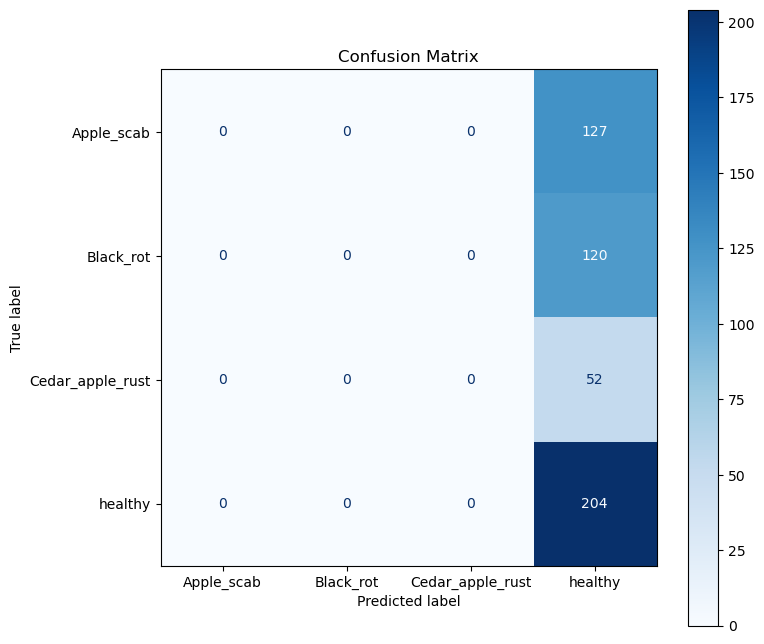

In [34]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [35]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.00      0.00      0.00       127
       Black_rot       0.00      0.00      0.00       120
Cedar_apple_rust       0.00      0.00      0.00        52
         healthy       0.41      1.00      0.58       204

        accuracy                           0.41       503
       macro avg       0.10      0.25      0.14       503
    weighted avg       0.16      0.41      0.23       503



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Define EfficientNet Model with Trainable Base

In [36]:
# Load the EfficientNetB0 architecture with pre-trained ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model's layers to prevent training them initially
base_model.trainable = True

# Add custom layers for multi-class classification
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global average pooling layer
x = Dense(128, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout layer for regularization
output = Dense(4, activation='softmax')(x)  # Output layer with 4 neurons for multi-class classification

# Create the final model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.000001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_6 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ normalization_3               │ (None, 224, 224, 3)       │               7 │ rescaling_6[0][0]          │
│ (Normalization)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ rescaling_7 (Rescaling)       │ (None, 224, 224, 3)       │               0 │ normalization_3[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv_pad (ZeroPadding2D) │ (None, 225, 225, 3)       │               0 │ rescaling_7[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_conv (Conv2D)            │ (None, 112, 112, 32)      │             864 │ stem_conv_pad[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_bn (BatchNormalization)  │ (None, 112, 112, 32)      │             128 │ stem_conv[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ stem_activation (Activation)  │ (None, 112, 112, 32)      │               0 │ stem_bn[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_dwconv                │ (None, 112, 112, 32)      │             288 │ stem_activation[0][0]      │
│ (DepthwiseConv2D)             │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_bn                    │ (None, 112, 112, 32)      │             128 │ block1a_dwconv[0][0]       │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_activation            │ (None, 112, 112, 32)      │               0 │ block1a_bn[0][0]           │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_squeeze            │ (None, 32)                │               0 │ block1a_activation[0][0]   │
│ (GlobalAveragePooling2D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reshape (Reshape)  │ (None, 1, 1, 32)          │               0 │ block1a_se_squeeze[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_reduce (Conv2D)    │ (None, 1, 1, 8)           │             264 │ block1a_se_reshape[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ block1a_se_expand (Conv2D)    │ (None, 1, 1, 32)          │             28

 Total params: 4,214,055 (16.08 MB)

 Trainable params: 4,172,032 (15.92 MB)

 Non-trainable params: 42,023 (164.16 KB)

# Train the EfficientNet Model

In [39]:
# Train the model
history = model.fit(train_images, train_labels, epochs=50, validation_data=(test_images, test_labels), batch_size=32)

Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.6856 - loss: 0.9077 - val_accuracy: 0.7873 - val_loss: 0.8342
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7214 - loss: 0.8835 - val_accuracy: 0.8012 - val_loss: 0.8261
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7197 - loss: 0.8846 - val_accuracy: 0.8091 - val_loss: 0.8140
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.7439 - loss: 0.8445 - val_accuracy: 0.8091 - val_loss: 0.7968
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.7337 - loss: 0.8401 - val_accuracy: 0.8270 - val_loss: 0.7771
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7293 - loss: 0.8398 - val_accuracy: 0.8370 - val_loss: 0.7512
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.7308 - loss: 0.8285 - val_accuracy: 0.8330 - val_loss: 0.7345
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7645 - loss: 0.7895 - val_accuracy: 0.8290 - val_loss:

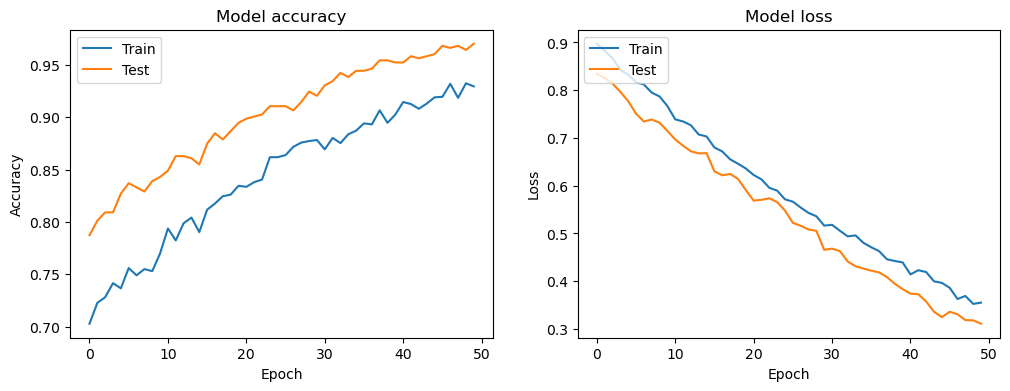

In [40]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

# Evaluate the Model

In [41]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - accuracy: 0.9752 - loss: 0.2993
Test Loss: 0.3110
Test Accuracy: 0.9702


In [42]:
# Predict the labels on the test set
pred_labels = np.argmax(model.predict(test_images), axis=1)

16/16 ━━━━━━━━━━━━━━━━━━━━ 6s 270ms/step


In [43]:
# Calculate the confusion matrix
cm = confusion_matrix(test_labels, pred_labels)

# Define the class names
class_names = ['Apple_scab', 'Black_rot', 'Cedar_apple_rust', 'healthy']

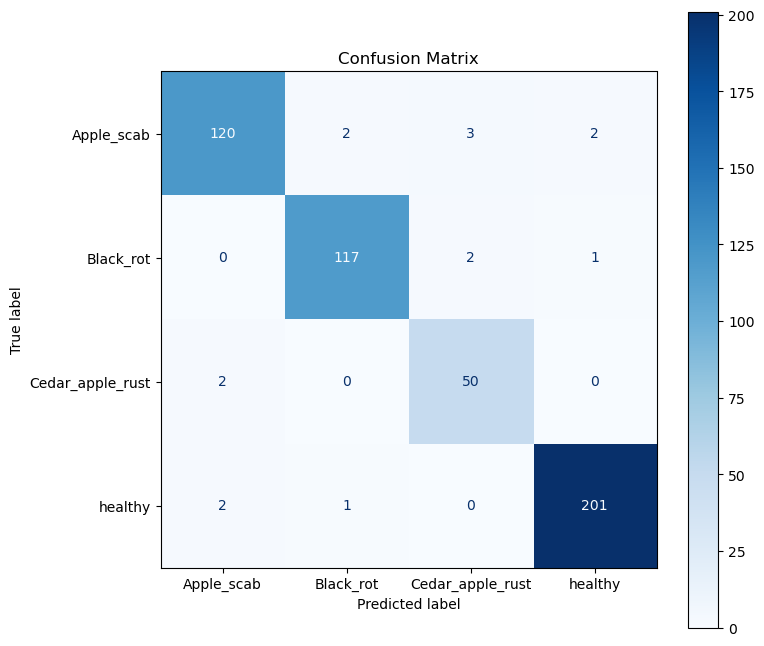

In [44]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
disp.plot(cmap='Blues', values_format='d', ax=ax, colorbar=True)
plt.grid(False)  # Remove grid lines
plt.title("Confusion Matrix")
plt.show()

In [45]:
# Print a classification report
print(classification_report(test_labels, pred_labels, target_names=class_names))

                  precision    recall  f1-score   support

      Apple_scab       0.97      0.94      0.96       127
       Black_rot       0.97      0.97      0.97       120
Cedar_apple_rust       0.91      0.96      0.93        52
         healthy       0.99      0.99      0.99       204

        accuracy                           0.97       503
       macro avg       0.96      0.97      0.96       503
    weighted avg       0.97      0.97      0.97       503

